# 图像处理特征不变算子-SUSAN算子

In [1]:
#coding:utf-8
%matplotlib  inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.imread('../datas/f2.jpg',0)

In [3]:
rows,cols = gray.shape

In [9]:
offsetx = np.array([
    -1, 0, 1,  
    -2,-1, 0, 1, 2,
    -3,-2,-1, 0, 1, 2, 3,  
    -3,-2,-1, 0, 1, 2, 3,  
    -3,-2,-1, 0, 1, 2, 3,  
    -2,-1, 0, 1, 2,  
    -1, 0, 1
])
offsety = np.array([
        -3,-3,-3,  
        -2,-2,-2,-2,-2,  
        -1,-1,-1,-1,-1,-1,-1,  
        0, 0, 0, 0, 0, 0, 0,  
        1, 1, 1, 1, 1, 1, 1,  
        2, 2, 2, 2, 2,  
        3, 3, 3  
])

In [13]:
mmax,mmin = 0,0
dst = np.zeros_like(gray)
for i in range(3,rows - 3):
    for j in range(3,cols - 3):
        sumval = 0.
        same = 0.
        for k in range(37):
            sumval += gray[i + offsety[k],j + offsetx[k]]
            thresh = sumval / 37
            data_abs = gray[i + offsety[k],j + offsetx[k]] - gray[i,j]
            if np.abs(data_abs) <= thresh:
                same += 1
        if same < 18:
            dst[i,j] = 255
        else:
            dst[i,j] = 0

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


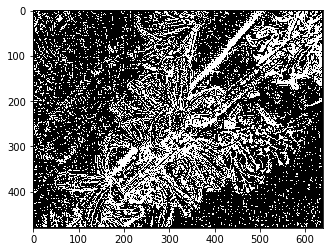

In [14]:
plt.imshow(dst,'gray')

参考：

[1]. https://blog.csdn.net/songzitea/article/details/8762846